## Chapter 03 Running_Mean

#### 3.1

In [6]:
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt
import math

In [3]:
from data_loader import load_detrended_ssta

ssta, lon2, lat2, y, m = load_detrended_ssta()

In [4]:
def aave(west, east, south, north, \
        var = ssta, lon2 = lon2, lat2 = lat2):

    avar = var[(west<=lon2[:, 1])*(lon2[:, 1]<=east), :, :]
    avar = avar[:, (south<=lat2[1, :])*(lat2[1, :]<=north), :]

    alat2 = lat2[(west<=lon2[:, 1])*(lon2[:, 1]<=east), :]
    alat2 = alat2[:, (south<=lat2[1, :])*(lat2[1, :]<=north)]

    [imt, jmt, tmt] = avar.shape
    numer = np.zeros((imt, jmt, tmt))
    denom = np.zeros((imt, jmt, tmt))
    for k in range(tmt):
            for i in range(imt):
                for j in range(jmt):
                    numer[i, j, k] \
                          = avar[i, j, k] * math.cos(math.radians(alat2[i, j]))
                    denom[i, j, k] \
                          = math.cos(math.radians(alat2[i, j]))
    
    aave_var = np.nansum(np.nansum(numer, 0), 0) / \
               np.nansum(np.nansum(denom, 0), 0)
    return aave_var

def plot_mon_time(time_series, lower= -3, upper = 3, \
                  init_year=1982, fin_year=2019):
    mon = np.arange(init_year, fin_year+1, 1/12)
    plt.figure;
    plt.plot(mon, time_series)
    plt.plot(mon, 0*time_series, 'k')
    plt.xlim(init_year, fin_year)
    plt.ylim(lower, upper)
    plt.show()


In [8]:
nino34 = aave(190, 250, -5, 5)

### 3.1

In [9]:
def running_mean(time_series, wn):
    b = np.ones(wn)/wn
    time_series_r = np.convolve(time_series, b, mode="same")
    n_conv = math.ceil(wn/2)
    time_series_r[0] = time_series_r[0] * wn/n_conv
    for i in range(1, n_conv):
        time_series_r[i] = time_series_r[i] * wn/(i+n_conv)
        time_series_r[-i] = time_series_r[-i] * wn/(i+n_conv-(wn%2))
    return time_series_r
    

In [11]:
nino34_r5 = running_mean(nino34, wn=5)

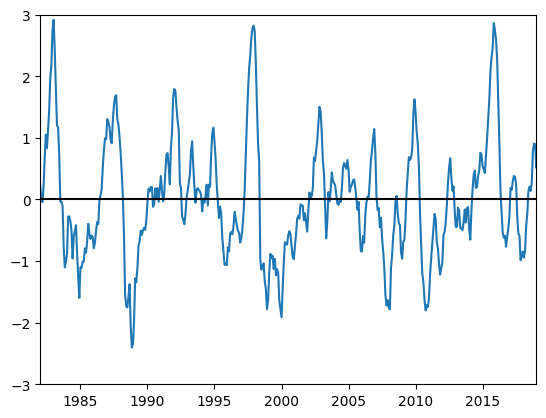

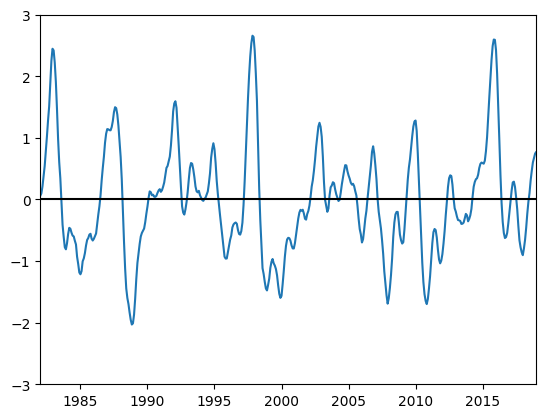

In [13]:
plot_mon_time(nino34)
plot_mon_time(nino34_r5)

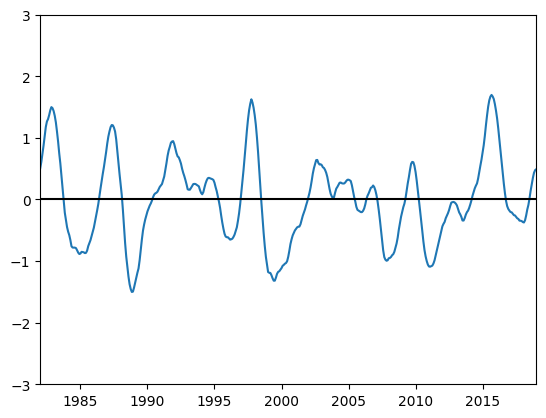

In [14]:
nino34_r15 = running_mean(nino34, wn=15)
plot_mon_time(nino34_r15)

In [18]:
def plot_2_mon_time(time_series1, time_series2, lower=-3, upper=3, init_year=1982, fin_year=2019):
    mon = np.arange(init_year, fin_year+1, 1/12)
    plt.figure;
    plt.plot(mon, time_series1, 'b--')
    plt.plot(mon, time_series2, 'r')
    plt.plot(mon, 0*time_series1, 'k')
    plt.xlim(init_year, fin_year)
    plt.ylim(lower, upper)
    plt.show()


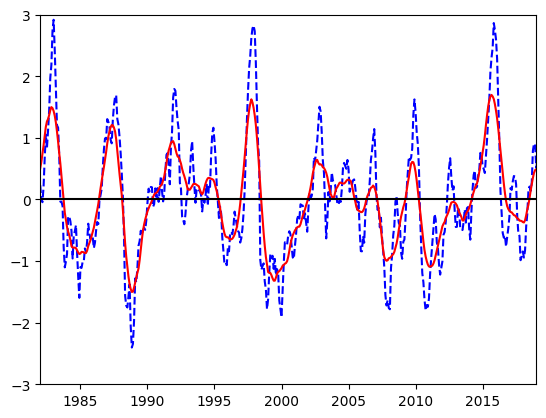

In [19]:
plot_2_mon_time(nino34, nino34_r15)

In [35]:
from data_loader import load_tokyo_temp
y, m, tokyo = load_tokyo_temp()
tokyo = tokyo[(1990 <= y)*(y <=2019)]
m = m[(1990 <= y)*(y <=2019)]
y = y[(1990 <= y)*(y <=2019)]

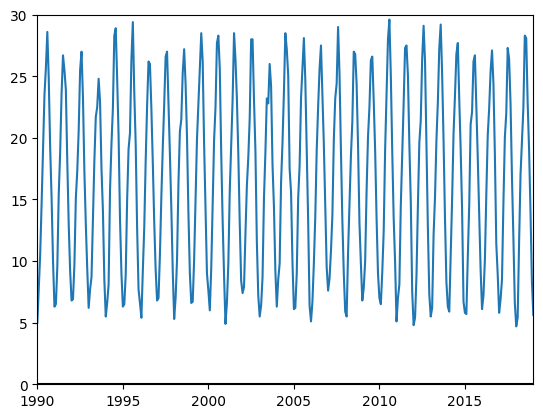

In [39]:
plot_mon_time(tokyo, lower=0, upper=30, init_year=1990, fin_year=2019)

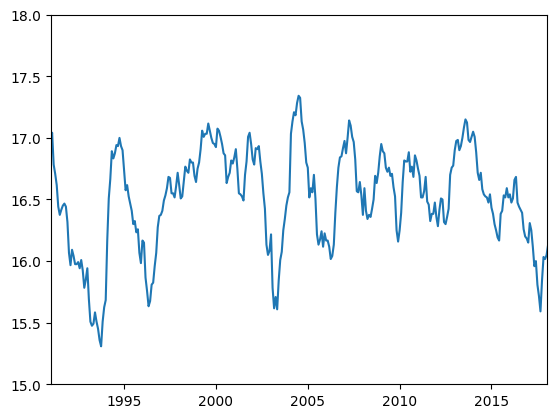

In [40]:
tokyo_r = running_mean(tokyo, wn=12)
plot_mon_time(tokyo_r[12:-12], lower=15, upper=18, init_year=1991, fin_year=2018)